In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
base = 'satelite_data'

if not os.path.exists(base):
    os.makedirs(base)

In [ ]:
# !gdown --id 1vY_eijK2ARUMTzVG6hGGrFom1B91c4bX -O {base}/merged_data.csv
!gdown --id 1yN0ln0NJi0-cBD6xTsUJrOIlmm57Dc9Q -O {base}/dataset.csv

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yN0ln0NJi0-cBD6xTsUJrOIlmm57Dc9Q
To: /content/satelite_data/dataset.csv
100% 2.39M/2.39M [00:00<00:00, 157MB/s]


In [ ]:
data = pd.read_csv(os.path.join(base, 'dataset.csv'))
data

,location,B2_2024-01,B2_2024-02,B2_2024-03,B2_2024-04,B2_2024-05,B2_2024-06,B2_2024-07,B2_2024-08,B2_2024-09,...,VV_ent_2024-04,VV_ent_2024-05,VV_ent_2024-06,VV_ent_2024-07,VV_ent_2024-08,VV_ent_2024-09,VV_ent_2024-10,VV_ent_2024-11,VV_ent_2024-12,class
0,Location_1,392.0,642.0,1510.5,2986.0,455.0,408.0,750.5,615.5,662.0,...,5.238523,5.266343,5.249825,5.247753,5.236627,5.261103,5.271101,5.261828,5.243223,tebu
1,Location_10,466.5,586.5,356.5,817.5,434.0,329.0,473.5,488.5,745.5,...,5.279375,5.290195,5.262574,5.261156,5.245557,5.273984,5.253889,5.266538,5.273718,tebu
2,Location_100,885.0,506.5,661.0,476.0,490.5,1286.0,419.0,1205.0,321.0,...,5.262306,5.260171,5.252504,5.254760,5.281956,5.247375,5.267330,5.235875,5.291425,tebu
3,Location_101,1031.0,622.0,2175.5,530.0,512.5,832.0,686.5,1559.5,805.0,...,5.290820,5.281692,5.280640,5.274906,5.293938,5.282001,5.287665,5.255166,5.283386,tebu
4,Location_102,1895.0,742.5,443.0,426.0,611.0,444.0,518.5,1199.0,531.0,...,5.279391,5.285950,5.269042,5.267692,5.256470,5.264337,5.274964,5.274470,5.271800,tebu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,Location_87,724.5,489.5,570.5,499.5,648.0,595.5,435.5,757.0,973.5,...,5.239265,5.252907,5.280079,5.276531,5.264420,5.259160,5.273824,5.253396,5.252046,others
815,Location_88,1296.0,767.0,419.0,444.5,548.5,664.5,722.0,988.0,1885.0,...,5.279066,5.274812,5.288281,5.277521,5.272784,5.270111,5.292791,5.276701,5.278095,others
816,Location_89,1296.0,767.0,419.0,444.5,548.5,664.5,722.0,988.0,1885.0,...,5.279066,5.274812,5.288281,5.277521,5.272784,5.270111,5.292791,5.276701,5.278095,others
817,Location_9,1224.5,372.0,490.0,2699.0,1176.5,495.0,460.5,646.0,475.0,...,5.277642,5.254273,5.275746,5.278970,5.280733,5.281858,5.266729,5.268897,5.274100,others


In [ ]:
data = data.drop(columns=['location'])
data

,B2_2024-01,B2_2024-02,B2_2024-03,B2_2024-04,B2_2024-05,B2_2024-06,B2_2024-07,B2_2024-08,B2_2024-09,B2_2024-10,...,VV_ent_2024-04,VV_ent_2024-05,VV_ent_2024-06,VV_ent_2024-07,VV_ent_2024-08,VV_ent_2024-09,VV_ent_2024-10,VV_ent_2024-11,VV_ent_2024-12,class
0,392.0,642.0,1510.5,2986.0,455.0,408.0,750.5,615.5,662.0,557.0,...,5.238523,5.266343,5.249825,5.247753,5.236627,5.261103,5.271101,5.261828,5.243223,tebu
1,466.5,586.5,356.5,817.5,434.0,329.0,473.5,488.5,745.5,629.5,...,5.279375,5.290195,5.262574,5.261156,5.245557,5.273984,5.253889,5.266538,5.273718,tebu
2,885.0,506.5,661.0,476.0,490.5,1286.0,419.0,1205.0,321.0,828.0,...,5.262306,5.260171,5.252504,5.254760,5.281956,5.247375,5.267330,5.235875,5.291425,tebu
3,1031.0,622.0,2175.5,530.0,512.5,832.0,686.5,1559.5,805.0,880.5,...,5.290820,5.281692,5.280640,5.274906,5.293938,5.282001,5.287665,5.255166,5.283386,tebu
4,1895.0,742.5,443.0,426.0,611.0,444.0,518.5,1199.0,531.0,585.0,...,5.279391,5.285950,5.269042,5.267692,5.256470,5.264337,5.274964,5.274470,5.271800,tebu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,724.5,489.5,570.5,499.5,648.0,595.5,435.5,757.0,973.5,942.0,...,5.239265,5.252907,5.280079,5.276531,5.264420,5.259160,5.273824,5.253396,5.252046,others
815,1296.0,767.0,419.0,444.5,548.5,664.5,722.0,988.0,1885.0,834.0,...,5.279066,5.274812,5.288281,5.277521,5.272784,5.270111,5.292791,5.276701,5.278095,others
816,1296.0,767.0,419.0,444.5,548.5,664.5,722.0,988.0,1885.0,834.0,...,5.279066,5.274812,5.288281,5.277521,5.272784,5.270111,5.292791,5.276701,5.278095,others
817,1224.5,372.0,490.0,2699.0,1176.5,495.0,460.5,646.0,475.0,289.5,...,5.277642,5.254273,5.275746,5.278970,5.280733,5.281858,5.266729,5.268897,5.274100,others


In [ ]:
# # Buat daftar nama kolom baru
# new_column_names = []

# new_column_names.append('Class')

# # 1. Sentinel-2 Bands (B2 - B8A, masing-masing 12 bulan)
# for band in ["B2", "B3", "B4", "B5", "B6", "B7", "B8", "B8A"]:
#     for month in range(1, 13):  # 12 bulan
#         new_column_names.append(f"{band}_{month}")

# # 2. NDVI & NDWI (masing-masing 12 bulan)
# for index in ["NDVI", "NDWI"]:
#     for month in range(1, 13):  # 12 bulan
#         new_column_names.append(f"{index}_{month}")

# # 3. Sentinel-1 VV & VH (masing-masing 12 bulan)
# for radar in ["VV", "VH"]:
#     for month in range(1, 13):  # 12 bulan
#         new_column_names.append(f"{radar}_{month}")

# # 4. CHIRPS (12 bulan)
# for month in range(1, 13):  # 12 bulan
#     new_column_names.append(f"CHIRPS_{month}")

# # 5. Terrain (Elevation, Slope, Aspect)
# new_column_names.extend(["Elevation", "Slope", "Aspect"])

# # 6. Statistik VV & VH
# # VV (10 statistik)
# for stat in ["Mean", "Median", "StdDev", "CoV", "Min", "Max", "Range", "IQR", "Skewness", "Kurtosis"]:
#     new_column_names.append(f"VV_{stat}")
# # VH (10 statistik)
# for stat in ["Mean", "Median", "StdDev", "CoV", "Min", "Max", "Range", "IQR", "Skewness", "Kurtosis"]:
#     new_column_names.append(f"VH_{stat}")

# # 7. Entropi VV & VH
# new_column_names.extend(["VV_Entropy", "VH_Entropy"])

# # Validasi jumlah kolom
# if len(data.columns) == len(new_column_names):
#     # Ganti nama kolom
#     data.columns = new_column_names
#     print("Kolom berhasil diganti:")
#     print(data.head())
# else:
#     print(f"Jumlah kolom tidak sesuai: {len(data.columns)} kolom dalam file vs {len(new_column_names)} nama kolom.")

Kolom berhasil diganti:
   Class      B2_1      B2_2      B2_3      B2_4      B2_5      B2_6  \
0      4  0.051166  0.066034  0.063299  0.162909  0.173840  0.103043   
1      4  0.041163  0.073449  0.084577  0.097461  0.093803  0.045156   
2      3  0.072416  0.129937  0.134894  0.097134  0.072244  0.057077   
3      3  0.074673  0.111059  0.101137  0.076099  0.066573  0.047397   
4      3  0.072276  0.119697  0.113054  0.085009  0.063719  0.042546   

       B2_7      B2_8      B2_9  ...  VH_StdDev    VH_CoV     VH_Min  \
0  0.014811  0.038940  0.054497  ...   0.935761 -0.089926 -11.703547   
1  0.029049  0.014436  0.127593  ...   1.269115 -0.145843 -11.510554   
2  0.070750  0.059574  0.075071  ...   1.244691 -0.129092 -11.651522   
3  0.071096  0.087114  0.106630  ...   1.828652 -0.176416 -12.470089   
4  0.047473  0.063731  0.077336  ...   1.314358 -0.124873 -12.745337   

     VH_Max  VH_Range    VH_IQR  VH_Skewness  VH_Kurtosis  VV_Entropy  \
0 -8.832947  2.870600  1.344082     0

In [ ]:
data['class'].value_counts()

,count
class,
others,338
jagung,219
padi,160
tebu,102


In [ ]:
data.isnull().sum()

,0
B2_2024-01,0
B2_2024-02,0
B2_2024-03,0
B2_2024-04,0
B2_2024-05,0
...,...
VV_ent_2024-09,0
VV_ent_2024-10,0
VV_ent_2024-11,0
VV_ent_2024-12,0


In [ ]:
null_rows = data[data.isnull().any(axis=1)]
null_rows

,B2_2024-01,B2_2024-02,B2_2024-03,B2_2024-04,B2_2024-05,B2_2024-06,B2_2024-07,B2_2024-08,B2_2024-09,B2_2024-10,...,VV_ent_2024-04,VV_ent_2024-05,VV_ent_2024-06,VV_ent_2024-07,VV_ent_2024-08,VV_ent_2024-09,VV_ent_2024-10,VV_ent_2024-11,VV_ent_2024-12,class


In [ ]:
null_rows['Class'].value_counts()

,count
Class,
4,49
1,24
2,23
3,20


In [ ]:
# # prompt: # prompt: create blox plot for column v176, v181-v184. ONE COLUMN ONE BOXPLOT PICTURE

# import matplotlib.pyplot as plt
# columns_to_plot = ['VH_CoV', 'VH_Skewness', 'VH_Kurtosis', 'VV_Entropy', 'VH_Entropy']

# for column in columns_to_plot:
#     plt.figure(figsize=(4, 6))  # Adjust figure size as needed
#     data[[column]].plot(kind='box', figsize=(3, 6))
#     plt.xlabel('Column: ' + column)
#     plt.title('Box Plot of ' + column)
#     plt.show()

In [ ]:
# data2 = data.iloc[:, :160]
# data2

In [ ]:
# VV_columns = [col for col in data2.columns if col.startswith("VV")]
# VH_columns = [col for col in data2.columns if col.startswith("VH")]

In [ ]:
# from scipy.stats import skew, kurtosis
# from skimage.measure import shannon_entropy

# data2["VV_mean"] = data2[VV_columns].mean(axis=1)  # Rata-rata (mean)
# data2["VV_median"] = data2[VV_columns].median(axis=1)  # Median
# data2["VV_std"] = data2[VV_columns].std(axis=1)  # Standar deviasi
# data2["VV_cov"] = data2[VV_columns].std(axis=1) / data2[VV_columns].mean(axis=1)  # Koefisien variasi (cov)
# data2["VV_min"] = data2[VV_columns].min(axis=1)  # Nilai minimum
# data2["VV_max"] = data2[VV_columns].max(axis=1)  # Nilai maksimum
# data2["VV_range"] = data2["VV_max"] - data2["VV_min"]  # Rentang nilai (range)
# data2["VV_iqr"] = data2[VV_columns].quantile(0.75, axis=1) - data2[VV_columns].quantile(0.25, axis=1)  # Interquartile range (IQR)
# data2["VV_skewness"] = data2[VV_columns].apply(lambda row: skew(row, nan_policy="omit"), axis=1)  # Skewness (kemiringan distribusi)
# data2["VV_kurtosis"] = data2[VV_columns].apply(lambda row: kurtosis(row, nan_policy="omit"), axis=1)  # Kurtosis (keruncingan distribusi)
# data2["VV_entropy"] = data2[VV_columns].apply(lambda row: shannon_entropy(row.values), axis=1)

In [ ]:
# data2["VH_mean"] = data2[VH_columns].mean(axis=1)  # Rata-rata (mean)
# data2["VH_median"] = data2[VH_columns].median(axis=1)  # Median
# data2["VH_std"] = data2[VH_columns].std(axis=1)  # Standar deviasi
# data2["VH_cov"] = data2[VH_columns].std(axis=1) / data2[VH_columns].mean(axis=1)  # Koefisien variasi (cov)
# data2["VH_min"] = data2[VH_columns].min(axis=1)  # Nilai minimum
# data2["VH_max"] = data2[VH_columns].max(axis=1)  # Nilai maksimum
# data2["VH_range"] = data2["VH_max"] - data2["VH_min"]  # Rentang nilai (range)
# data2["VH_iqr"] = data2[VH_columns].quantile(0.75, axis=1) - data2[VH_columns].quantile(0.25, axis=1)  # Interquartile range (IQR)
# data2["VH_skewness"] = data2[VH_columns].apply(lambda row: skew(row, nan_policy="omit"), axis=1)  # Skewness (kemiringan distribusi)
# data2["VH_kurtosis"] = data2[VH_columns].apply(lambda row: kurtosis(row, nan_policy="omit"), axis=1)  # Kurtosis (keruncingan distribusi)
# data2["VH_entropy"] = data2[VH_columns].apply(lambda row: shannon_entropy(row.values), axis=1)

In [ ]:
data2

,Class,B2_1,B2_2,B2_3,B2_4,B2_5,B2_6,B2_7,B2_8,B2_9,...,VH_median,VH_std,VH_cov,VH_min,VH_max,VH_range,VH_iqr,VH_skewness,VH_kurtosis,VH_entropy
0,4,0.051166,0.066034,0.063299,0.162909,0.173840,0.103043,0.014811,0.038940,0.054497,...,-16.414886,1.464891,-0.088954,-20.288923,-14.883554,5.405369,1.674071,-1.393518,1.918102,3.584963
1,4,0.041163,0.073449,0.084577,0.097461,0.093803,0.045156,0.029049,0.014436,0.127593,...,-14.079934,1.015485,-0.070943,-16.168594,-12.979137,3.189457,1.270927,-0.514167,-0.860135,3.584963
2,3,0.072416,0.129937,0.134894,0.097134,0.072244,0.057077,0.070750,0.059574,0.075071,...,-15.381279,1.630249,-0.107361,-17.357227,-12.947486,4.409741,2.948426,0.033167,-1.391010,3.584963
3,3,0.074673,0.111059,0.101137,0.076099,0.066573,0.047397,0.071096,0.087114,0.106630,...,-16.796113,1.502036,-0.088999,-19.354094,-14.303974,5.050119,2.084222,-0.033074,-0.882760,3.584963
4,3,0.072276,0.119697,0.113054,0.085009,0.063719,0.042546,0.047473,0.063731,0.077336,...,-15.983617,1.292886,-0.080859,-18.481468,-13.801738,4.679730,1.669744,-0.287411,-0.448750,3.584963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,4,0.093036,0.113154,0.100619,0.087097,0.074813,0.069877,0.115161,0.145883,0.150109,...,-15.548740,1.489077,-0.095018,-17.512320,-12.186235,5.326084,1.871744,0.899113,0.474182,3.584963
894,1,0.094410,0.173460,0.105660,0.048029,0.063841,0.072854,0.069944,0.064209,0.061489,...,-17.464885,1.352397,-0.077258,-19.294100,-15.403182,3.890918,2.483676,0.080530,-1.391539,3.584963
895,1,0.043085,0.242560,0.368210,0.318800,0.159197,0.119543,0.095403,0.055606,0.046920,...,-16.703973,1.899916,-0.111726,-21.555120,-13.811726,7.743395,1.258003,-0.906823,1.227001,3.584963
896,4,0.056129,0.348386,0.324371,0.177077,0.062789,0.109074,0.094449,0.054160,0.012397,...,-14.527012,1.362257,-0.091687,-16.909941,-12.996651,3.913290,2.118690,-0.273845,-1.219729,3.584963


In [ ]:
data2['Class'].value_counts()

,count
Class,
3,299
4,238
2,224
1,137


In [ ]:
from imblearn.over_sampling import SMOTE

x = data.drop('class', axis=1)
y = data['class']

smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
y_smote.value_counts()

,count
class,
tebu,338
padi,338
jagung,338
others,338


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_smote)

In [ ]:
X_scaled

array([[-0.99747985, -0.13396088,  1.80397211, ..., -0.00510519,
        -0.43298731, -1.33121118],
       [-0.89307576, -0.25273116, -0.62199906, ..., -0.8300911 ,
        -0.20181904,  0.07049547],
       [-0.30659108, -0.42393156,  0.01812938, ..., -0.18584035,
        -1.70670133,  0.88436865],
       ...,
       [-0.92855997,  0.60203445, -0.71038062, ...,  0.50985774,
        -1.02009476, -0.20022863],
       [-0.07850429, -0.06122965, -0.5529981 , ...,  0.30614355,
        -0.04791011,  0.67205273],
       [-0.81962894, -0.14481949, -0.57588574, ..., -0.37160289,
         0.00969564,  0.42842495]])

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Pastikan y hanya memiliki nilai 0 hingga num_classes-1
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_smote)  # Ini akan mengubah label ke [0, 1, 2, 3] jika ada 4 kelas

# Konversi ke tensor PyTorch
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

In [ ]:
# Konversi ke tensor PyTorch
X_tensor = torch.tensor(X_scaled, dtype=torch.float32).unsqueeze(1)  # Menjadi (num_samples, 1, 181)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.1, random_state=42)

## **Model**

In [ ]:
class CNN1D(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNN1D, self).__init__()

        # 1st convolutional layer
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=5, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(128)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.3)

        # 2nd convolutional layer
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(256)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout(0.3)

        # 3rd convolutional layer
        self.conv3 = nn.Conv1d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(512)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.dropout3 = nn.Dropout(0.3)

        # Calculate the flattened size for fc1
        flattened_size = self._calculate_flattened_size(input_size)
        print(f"Flattened size: {flattened_size}")

        # Fully connected layers
        self.fc1 = nn.Linear(flattened_size, 256)
        self.dropout_fc = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def _calculate_flattened_size(self, input_length):
        # Helper function to calculate the output size after all convolution and pooling layers
        x = torch.zeros(1, 1, input_length)  # Dummy input with batch size 1, 1 channel
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.pool3(x)
        return x.numel()  # Total number of elements in the final output tensor

    # def _calculate_flattened_size(self, input_length):# Debugging untuk memastikan shape tetap sesuai
    #     print(f"Calculating flattened size with input_length: {input_length}")

    #     x = torch.zeros(1, 1, input_length)  # Dummy input dengan (batch_size=1, channels=1, sequence_length)

    #     x = self.conv1(x)
    #     print(f"After conv1: {x.shape}")  # Debugging

    #     x = self.pool1(x)
    #     print(f"After pool1: {x.shape}")  # Debugging

    #     x = self.conv2(x)
    #     print(f"After conv2: {x.shape}")  # Debugging

    #     x = self.pool2(x)
    #     print(f"After pool2: {x.shape}")  # Debugging

    #     x = self.conv3(x)
    #     print(f"After conv3: {x.shape}")  # Debugging

    #     x = self.pool3(x)
    #     print(f"After pool3: {x.shape}")  # Debugging

    #     return x.numel()  # Mengembalikan total elemen dalam tensor


    def forward(self, x):
        # print(f"Shape sebelum Conv1D: {x.shape}")
        #x = x.unsqueeze(1)  # Add the channel dimension (batch_size, 1, input_size)

        # 1st block: Conv -> BatchNorm -> ReLU -> Pool -> Dropout
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.dropout1(x)

        # 2nd block: Conv -> BatchNorm -> ReLU -> Pool -> Dropout
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.dropout2(x)

        # 3rd block: Conv -> BatchNorm -> ReLU -> Pool -> Dropout
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = self.dropout3(x)

        # print(f"Shape sebelum flatten: {x.shape}")
        x = x.view(x.size(0), -1)  # Flatten the tensor

        # Fully connected layers with Dropout
        x = F.relu(self.fc1(x))
        x = self.dropout_fc(x)
        x = self.fc2(x)

        return x


In [ ]:
class CNNLSTM(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNNLSTM, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=128, kernel_size=5, stride=1, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Dropout(0.3),

            nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Dropout(0.3),

            nn.Conv1d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        self.lstm = nn.LSTM(input_size=512, hidden_size=256, num_layers=1, batch_first=True)
        self.dropout_lstm = nn.Dropout(0.5)
        self.fc = nn.Linear(256, num_classes)

    def forward(self, x):
        #x = x.unsqueeze(1)  # Add the channel dimension (batch_size, 1, input_size)

        # CNN feature extraction
        x = self.cnn(x)

        # Reshape for LSTM (batch_size, seq_len, feature_size)
        x = x.permute(0, 2, 1)

        # LSTM processing
        x, _ = self.lstm(x)
        x = self.dropout_lstm(x)  # Apply dropout after LSTM

        # Take the output of the last time step
        x = x[:, -1, :]

        # Fully connected layer
        x = self.fc(x)

        return x

In [ ]:
class CNN1DATT(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNN1DATT, self).__init__()

        # 1st convolutional layer
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=5, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(128)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.3)

        # 2nd convolutional layer
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(256)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout(0.3)

        # 3rd convolutional layer
        self.conv3 = nn.Conv1d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(512)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.dropout3 = nn.Dropout(0.3)

        self.flattened_size = self._calculate_flattened_size(input_size)

        # Attention mechanism - applied to each channel
        self.attention = nn.Sequential(
            nn.Conv1d(512, 128, kernel_size=1),
            nn.Tanh(),
            nn.Conv1d(128, 1, kernel_size=1),
            nn.Softmax(dim=2)
        )

        # Fully connected layers
        self.fc1 = nn.Linear(self.flattened_size, 256)
        self.dropout_fc = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def _calculate_flattened_size(self, input_length):
        # Helper function to calculate the output size after all convolution and pooling layers
        x = torch.zeros(1, 1, input_length)  # Dummy input with batch size 1, 1 channel
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.pool3(x)
        return x.numel()  # Total number of elements in the final output tensor

    def forward(self, x):
        #x = x.unsqueeze(1)

        # Convolutional layers
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.dropout1(x)

        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.dropout2(x)

        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = self.dropout3(x)

        # Attention mechanism
        attn_weights = self.attention(x)
        # attn_weights = attn_weights.permute(0, 2, 1)
        x = x * attn_weights

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout_fc(x)
        x = self.fc2(x)

        return x

In [ ]:
class CNNLSTMATT(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNNLSTMATT, self).__init__()

        # CNN layers
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=128, kernel_size=5, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Dropout(0.3),

            nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Dropout(0.3),

            nn.Conv1d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        # LSTM layer
        self.lstm = nn.LSTM(input_size=512, hidden_size=256, num_layers=1, batch_first=True)
        self.dropout_lstm = nn.Dropout(0.5)

        # Attention mechanism
        self.attention = nn.Sequential(
            nn.Linear(256, 128),
            nn.Tanh(),
            nn.Linear(128, 1),
            nn.Softmax(dim=1)
        )

        # Fully connected layer
        self.fc = nn.Linear(256, num_classes)

    def forward(self, x):
        #x = x.unsqueeze(1)

        # CNN feature extraction
        x = self.cnn(x)

        # Reshape for LSTM
        x = x.permute(0, 2, 1)

        # LSTM processing
        x, _ = self.lstm(x)
        x = self.dropout_lstm(x)

        # Attention mechanism
        attn_weights = self.attention(x)
        # attn_weights = attn_weights.permute(0, 2, 1)

        x = x * attn_weights

        # Take the output of the last time step
        x = x[:, -1, :]

        # Fully connected layer
        x = self.fc(x)

        return x

## **New Section**

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 32  # Sesuaikan dengan kebutuhanmu

# Buat dataset PyTorch
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Buat DataLoader untuk training dan testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# import torch

# def train_model_1D(model, train_loader, test_loader, device, epochs, learning_rate):
#     print(f"\nTraining 1D model: {model.__class__.__name__}")
#     model.to(device)
#     criterion = torch.nn.CrossEntropyLoss()
#     optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#     for epoch in range(epochs):
#         model.train()
#         total_train_loss = 0.0
#         correct_train = 0
#         total_train = 0

#         for X_batch, y_batch in train_loader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             # Debugging: Print shape sebelum masuk ke model
#             print(f"Shape X_batch sebelum processing: {X_batch.shape}")  # Cek apakah sudah benar

#             # Jika ada dimensi ekstra yang tidak perlu, hapus dengan .squeeze()
#             if len(X_batch.shape) == 4:  # Jika berbentuk (batch_size, 1, 1, sequence_length)
#                 X_batch = X_batch.squeeze(2)  # Hapus dimensi ekstra ke-2

#             print(f"Shape X_batch setelah processing: {X_batch.shape}")  # Pastikan (batch_size, 1, 181)

#             # Forward pass
#             outputs = model(X_batch)
#             print(f"Shape setelah forward pass: {outputs.shape}")  # Debugging setelah lewat CNN
#             loss = criterion(outputs, y_batch)

#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             total_train_loss += loss.item()
#             _, predicted = torch.max(outputs, 1)
#             correct_train += (predicted == y_batch).sum().item()
#             total_train += y_batch.size(0)

#         train_acc = correct_train / total_train
#         train_loss = total_train_loss / len(train_loader)

#         test_acc, test_loss = evaluate_model(model, test_loader, criterion, device, is_1D=True)
#         print(f"Epoch {epoch+1}/{epochs}, Train Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}, "
#               f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

In [ ]:
epochs = 20
learning_rate = 0.001

In [ ]:
def evaluate_model(model, test_loader, criterion, device, is_1D=True):
    model.eval()
    total_test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            # X_batch = X_batch.unsqueeze(1) if is_1D else X_batch.unsqueeze(1).unsqueeze(3)

            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == y_batch).sum().item()
            total_test += y_batch.size(0)

    test_acc = correct_test / total_test
    test_loss = total_test_loss / len(test_loader)
    return test_acc, test_loss

Flattened size: 14336

Training 1D model: CNN1D
Epoch 1/20, Train Accuracy: 0.4975, Train Loss: 1.8908, Test Accuracy: 0.6765, Test Loss: 0.7894
Epoch 2/20, Train Accuracy: 0.6225, Train Loss: 0.9125, Test Accuracy: 0.7132, Test Loss: 0.7223
Epoch 3/20, Train Accuracy: 0.6760, Train Loss: 0.7957, Test Accuracy: 0.7721, Test Loss: 0.6087
Epoch 4/20, Train Accuracy: 0.7105, Train Loss: 0.7095, Test Accuracy: 0.7574, Test Loss: 0.6179
Epoch 5/20, Train Accuracy: 0.7171, Train Loss: 0.6739, Test Accuracy: 0.7574, Test Loss: 0.6016
Epoch 6/20, Train Accuracy: 0.7558, Train Loss: 0.6146, Test Accuracy: 0.7721, Test Loss: 0.5391
Epoch 7/20, Train Accuracy: 0.7590, Train Loss: 0.5903, Test Accuracy: 0.8162, Test Loss: 0.4938
Epoch 8/20, Train Accuracy: 0.7681, Train Loss: 0.5487, Test Accuracy: 0.7868, Test Loss: 0.5057
Epoch 9/20, Train Accuracy: 0.7887, Train Loss: 0.5107, Test Accuracy: 0.7794, Test Loss: 0.5606
Epoch 10/20, Train Accuracy: 0.8355, Train Loss: 0.4408, Test Accuracy: 0.7721,

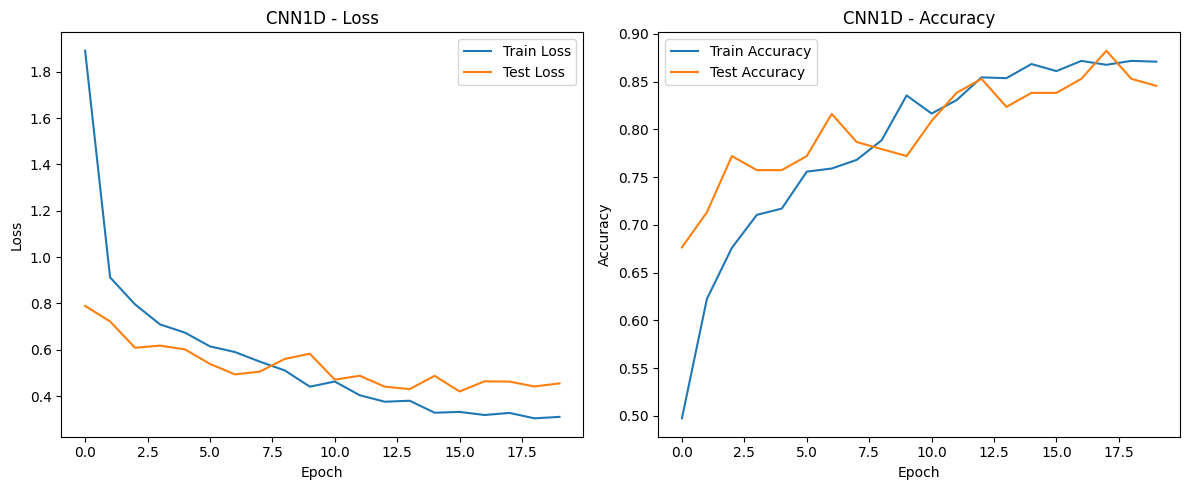

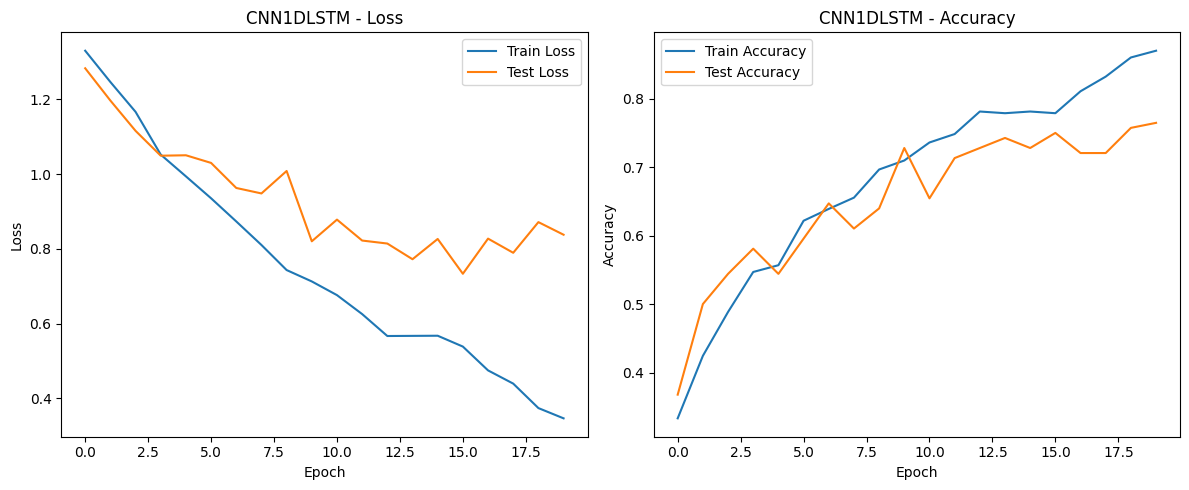

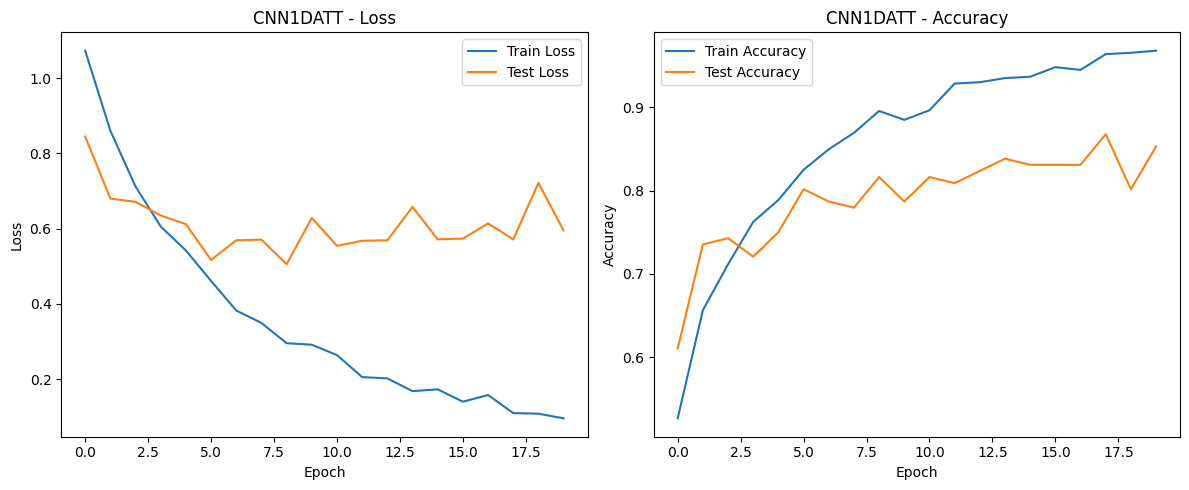

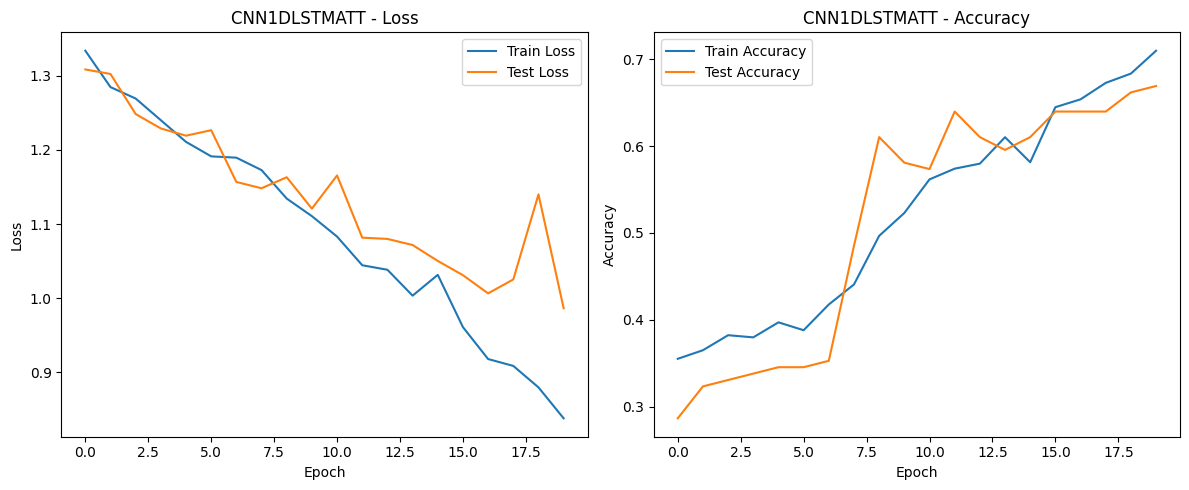

In [ ]:
# prompt: create visualisation of each model performance

import matplotlib.pyplot as plt

def train_model_1D(model, train_loader, test_loader, device, epochs, learning_rate):
    print(f"\nTraining 1D model: {model.__class__.__name__}")
    model.to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == y_batch).sum().item()
            total_train += y_batch.size(0)

        train_acc = correct_train / total_train
        train_loss = total_train_loss / len(train_loader)

        test_acc, test_loss = evaluate_model(model, test_loader, criterion, device, is_1D=False)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

        print(f"Epoch {epoch+1}/{epochs}, Train Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}, "
              f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

    return train_losses, train_accuracies, test_losses, test_accuracies

# Models for 1D CNNs
models_1d = {
    "CNN1D": CNN1D(input_size=228, num_classes=4),
    "CNN1DLSTM": CNNLSTM(input_size=228, num_classes=4),
    "CNN1DATT": CNN1DATT(input_size=228, num_classes=4),
    "CNN1DLSTMATT": CNNLSTMATT(input_size=228, num_classes=4)
}

# Store the results for each model
results = {}
for model_name, model in models_1d.items():
    results[model_name] = train_model_1D(model, train_loader, test_loader, device, epochs, learning_rate)

# Visualization
for model_name, metrics in results.items():
    train_losses, train_accuracies, test_losses, test_accuracies = metrics

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{model_name} - Loss')

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{model_name} - Accuracy')

    plt.tight_layout()
    plt.show()

In [ ]:
import joblib
import os

# Buat folder untuk menyimpan model (jika belum ada)
os.makedirs("saved_models_1d", exist_ok=True)

# Simpan semua model yang sudah dilatih
for model_name, model in models_1d.items():
    file_path = f"saved_models/{model_name}.joblib"
    joblib.dump(model.state_dict(), file_path)
    print(f"Model {model_name} disimpan di {file_path}")